# Scott Breitbach
## 16-May-2022
## DSC650, Week 10

### 10.1
#### Assignment 10.1.a
Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.
```python
def tokenize(sentence):
    tokens = []
    # tokenize the sentence
    return tokens
```

In [1]:
import string

def tokenize(sentence):
  # standardize to lowercase
  sentence = sentence.lower()
  # remove punctuation
  sentence = "".join(char for char in sentence if char not in string.punctuation)
  # split words into separate tokens
  return sentence.split()

In [2]:
text = "Okay, here's some text."
text

"Okay, here's some text."

In [3]:
tokenized_text = tokenize(text)
tokenized_text

['okay', 'heres', 'some', 'text']


#### Assignment 10.1.b

Implement an `ngram` function that splits tokens into N-grams. 

```python
def ngram(tokens, n):
    ngrams = []
    # Create ngrams
    return ngrams
```

In [4]:
def ngram(tokens, n=1):
  # Zip the tokens into n-grams
  zippy = zip(*[tokens[i:] for i in range(n)])
  # Join the n-grams
  return [" ".join(ngram) for ngram in zippy]

In [5]:
unigram_text = ngram(tokenized_text)
unigram_text

['okay', 'heres', 'some', 'text']

In [6]:
bigram_text = ngram(tokenized_text, 2)
bigram_text

['okay heres', 'heres some', 'some text']

In [7]:
trigram_text = ngram(tokenized_text, 3)
trigram_text

['okay heres some', 'heres some text']

#### Assignment 10.1.c
Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.

```python
def one_hot_encode(tokens, num_words):
    token_index = {}
    results = ''
    return results
```

In [8]:
import numpy as np

def one_hot_encode(tokens, num_words):
  # Build an index of the tokens
  token_index = {}
  for word in tokens:
    if word not in token_index:
      # Assign an index to each unique word
      token_index[word] = len(token_index) + 1
  # Vectorize the tokens
  max_length = 10
  # Create vector of zeros
  results = np.zeros(shape=(max_length,
                            max(token_index.values()) + 1))
  # One-hot-encode the words to the results vector
  for i, word in list(enumerate(tokens))[:max_length]:
    index = token_index.get(word)
    results[i, index] = 1
  return results

In [9]:
one_hot_text = one_hot_encode(tokenized_text, 1000)
one_hot_text

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

### 10.2
Using listings 6.16, 6.17, and 6.18 in *Deep Learning with Python* as a guide, train a sequential model with embeddings on the IMDB data found in `data/external/imdb/`. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

Get data:

In [10]:
# Get data by cloning dsc650 GitHub repository
!git clone https://github.com/bellevue-university/dsc650

fatal: destination path 'dsc650' already exists and is not an empty directory.


Preprocess the data:

In [11]:
# Process the labels of the raw IMDB data
import os

imdb_dir = '/content/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [12]:
# Tokenizing the text and prepare a train/val split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 
training_samples = 200 
validation_samples = 10000
max_words = 10000 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices) # shuffle data before splitting
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


Define the model:

In [13]:
# Train the model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 100

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# Compile and train the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 254ms/step - loss: 0.6962 - acc: 0.4750 - val_loss: 0.6926 - val_acc: 0.5081
Epoch 2/10
7/7 [==============================] 

Evaluate the model on the test set:

In [14]:
# Tokenize the data of the test set
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

Plot the model's performance over time:

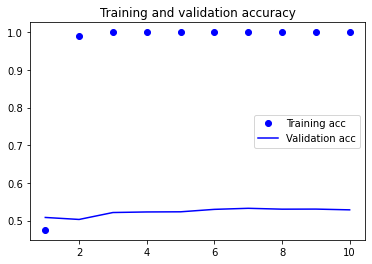

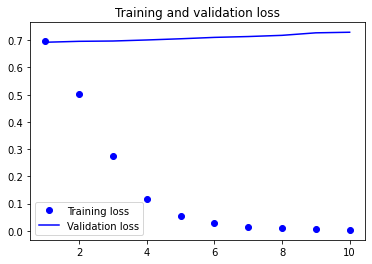

In [15]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate the model:

In [16]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 2s 3ms/step - loss: 0.7292 - acc: 0.5296
Model Loss:     0.729
Model Accuracy: 53.0%


#### 10.3
Using listing 6.27 in *Deep Learning with Python* as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [17]:
# Use the LSTM layer in Keras
from keras.layers import LSTM

max_features = 10000 # Number of words to consider as features

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 3s 578ms/step - loss: 0.6937 - acc: 0.4688 - val_loss: 0.6916 - val_acc: 0.6250
Epoch 2/10
2/2 [==============================] - 0s 99ms/step - loss: 0.6880 - acc: 0.8062 - val_loss: 0.6923 - val_acc: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 90ms/step - loss: 0.6817 - acc: 0.8813 - val_loss: 0.6940 - val_acc: 0.4250
Epoch 4/10
2/2 [==============================] - 0s 90ms/step - loss: 0.6726 - acc: 0.8750 - val_loss: 0.7002 - val_acc: 0.4000
Epoch 5/10
2/2 [==============================] - 0s 98ms/step - loss: 0.6556 - acc: 0.7750 - val_loss: 0.7269 - val_acc: 0.3500
Epoch 6/10
2/2 [==============================] - 0s 90ms/step - loss: 0.6086 - acc: 0.5750 - val_loss: 1.4139 - val_acc: 0.3500
Epoch 7/10
2/2 [==============================] - 0s 86ms/step - loss: 0.8510 - acc: 0.6062 - val_loss: 0.6940 - val_acc: 0.4250
Epoch 8/10
2/2 [==============================] - 0s 85ms/step - loss: 0.5111 - acc: 0.9375 - va

Plot the LSTM model's performance over time:



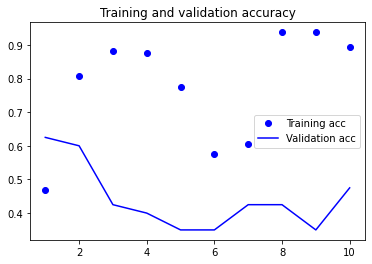

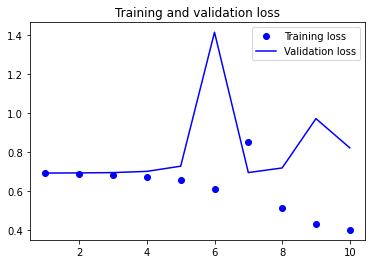

In [18]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate the LSTM model:

In [19]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 10s 12ms/step - loss: 0.7080 - acc: 0.6001
Model Loss:     0.708
Model Accuracy: 60.0%


#### 10.4
Using listing 6.46 in *Deep Learning with Python* as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

Example 1D convnet for the IMDB dataset

In [20]:
# Train and evaluate a simple 1D convnet on the IMDB data
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

max_len = 100 # set to match dimensions

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 94, 32)            28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 231ms/step - loss: 1.3499 - acc: 0.5000 - val_loss: 1.4175 - val_acc: 0.3500
Epoch 2/10
2/2 [==============================] - 0s 60ms/step - loss: 1.0548 - acc: 0.5000 - val_loss: 1.3353 - val_acc: 0.3500
Epoch 3/10
2/2 [==============================] - 0s 70ms/step - loss: 0.9701 - acc: 0.5000 - val_loss: 1.2834 - val_acc: 0.3500
Epoch 4/10
2/2 [==============================] - 0s 63ms/step - loss: 0.9160 - acc: 0.5000 - val_loss: 1.2311 - val_acc: 0.3500
Epoch 5/10
2/2 [==============================] - 0s 58ms/step - loss: 0.8687 - acc: 0.5000 - val_loss: 1.1958 - val_acc: 0.3500
Epoch 6/10
2/2 [==============================] - 0s 60ms/step - loss: 0.8345 - acc: 0.5000 - val_loss: 1.1621 - val_acc: 0.3500
Epoch 7/10
2/2 [==============================] - 0s 62ms/step - loss: 0.8037 - acc: 0.5000 - val_loss: 1.1321 - val_acc: 0.3500
Epoch 8/10
2/2 [==============================] - 0s 80ms/step - loss: 0.7764 - acc: 0.5000 - val_loss: 1.1

Plot the 1D convnet model's performance over time:

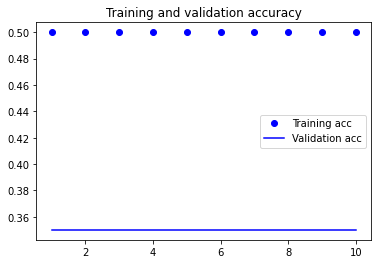

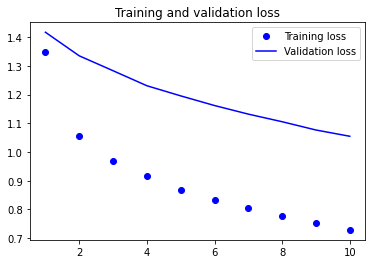

In [21]:
# Plot the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluate 1D convnet model:

In [22]:
# Evaluate the model on the test set
eval = model.evaluate(x_test, y_test)
print(f"Model Loss:     {eval[0]:.3f}")
print(f"Model Accuracy: {eval[1]*100:.1f}%")

782/782 [==============================] - 6s 8ms/step - loss: 0.8783 - acc: 0.5000
Model Loss:     0.878
Model Accuracy: 50.0%
